In [30]:
# import warnings
# warnings.filterwarnings("ignore")
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from neuralprophet import NeuralProphet

In [31]:
!pip install seaborn



In [32]:
# cpi=pd.read_csv("inflation-of-consumer-prices.csv")
# cpi.head()

In [33]:
# country="India"
# data=cpi[cpi["Entity"]==country].sort_values("Year")
# cp=data['Inflation, consumer prices (annual %)']
# years = pd.to_datetime(data["Year"], format="%Y")
# cp.head()
# cp.tail()
# plt.plot(years, cp)
# values=pd.DataFrame({"infl":cp,"years":years})
# print(values.iloc[:64])

In [34]:
# df = cpi.loc[cpi["Entity"] == "India", ["Year", "Inflation, consumer prices (annual %)"]].copy()
# df=cpi.rename(columns={'Year':'ds','Inflation, consumer prices (annual %)':'y'})

In [35]:
# df["y"] = pd.to_numeric(df["y"], errors="coerce")
# df.dropna(subset=["y"], inplace=True)
# df["ds"] = pd.to_datetime(df["ds"], format="%Y")
# df.sort_values("ds", inplace=True)
# df.drop_duplicates(subset="ds", keep="last", inplace=True)



In [36]:
# plt.plot(df["ds"],df["y"])

# plt.show()

In [37]:

# m = NeuralProphet()
# df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
# metrics = m.fit(df_train, freq="Y", validation_df=df_val)





In [38]:
# future = m.make_future_dataframe(df, periods=10)
# forecast = m.predict(future)
# forecast


In [39]:
# m.plot(forecast)
# m.plot_components(forecast)


In [40]:
# from neuralprophet import NeuralProphet
# import pandas as pd

# cpi = pd.read_csv("inflation-of-consumer-prices.csv")
# country = "India"
# data = cpi.loc[cpi["Entity"] == country, ["Year", "Inflation, consumer prices (annual %)"]].copy()


# df = data.rename(columns={"Year": "ds", "Inflation, consumer prices (annual %)": "y"})
# df["ds"] = pd.to_datetime(df["ds"], format="%Y")
# df["y"]  = pd.to_numeric(df["y"], errors="coerce")


# df = (df.groupby("ds", as_index=False)["y"].mean()
#         .sort_values("ds")
#         .dropna())




# m = NeuralProphet()
# df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)
# metrics = m.fit(df_train, freq="Y", validation_df=df_val)

# # 5) Forecast next 10 years only
# future = m.make_future_dataframe(df, periods=10, n_historic_predictions=False)
# forecast = m.predict(future)

# # 6) Plot
# m.plot(forecast)


In [41]:
import warnings
import numpy as np
from neuralprophet import NeuralProphet
warnings.filterwarnings("ignore")
import pandas as pd
from scipy import linalg
from matplotlib import pyplot as plt
cpi=pd.read_csv("inflation-of-consumer-prices.csv")
cpi.head()

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
0,Australia,AUS,1960,3.728814
1,Austria,AUT,1960,1.945749
2,Belgium,BEL,1960,0.299467
3,Bolivia,BOL,1960,11.533153
4,Burkina Faso,BFA,1960,7.788162


In [42]:
country="India"
data=cpi[cpi["Entity"]==country].sort_values("Year")
years=pd.to_datetime(data["Year"], format="%Y")
data.iloc[:,3].std()


4.806831234549597

7.301624906153846
4.806831234549597
12.108456140703442


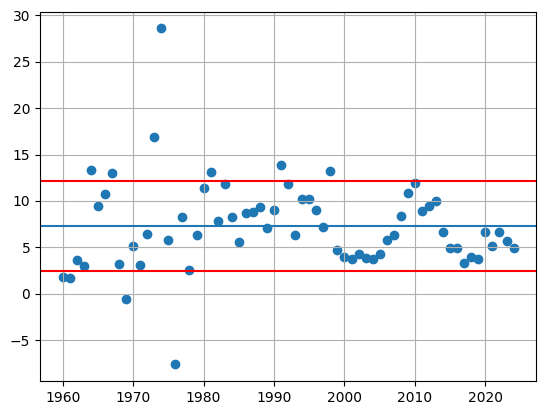

     Entity Code  Year  Inflation, consumer prices (annual %)
23    India  IND  1960                               1.779878
89    India  IND  1961                               1.695213
297   India  IND  1964                              13.355261
543   India  IND  1967                              13.062202
727   India  IND  1969                              -0.584137
1123  India  IND  1973                              16.940817
1227  India  IND  1974                              28.598734
1442  India  IND  1976                              -7.633948
2008  India  IND  1981                              13.112547
3355  India  IND  1991                              13.870246
4502  India  IND  1998                              13.230839


In [43]:
avg=data.iloc[:,3].mean()
sd=data.iloc[:,3].std()
print(avg)
print(sd)
print(avg+sd)
plt.scatter(years, data.iloc[:,3])
plt.axhline(avg)
plt.axhline(sd+avg,color="red")
plt.axhline(avg-sd,color="red")
plt.grid(True)
plt.show()
up=avg+sd
down=avg-sd
outliers=data[(data["Inflation, consumer prices (annual %)"]>up)|(data["Inflation, consumer prices (annual %)"]<down)]
print(outliers)

In [44]:
data_outlier=data.copy()
outlier_rep=((data_outlier["Inflation, consumer prices (annual %)"]>up)|(data_outlier["Inflation, consumer prices (annual %)"]<down))
outlier_years = data_outlier.loc[outlier_rep, "Year"].values
data_outlier.loc[outlier_rep, "Inflation, consumer prices (annual %)"]=np.nan
data_outlier

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
23,India,IND,1960,NaN
89,India,IND,1961,NaN
157,India,IND,1962,3.632215
227,India,IND,1963,2.946161
297,India,IND,1964,NaN
...,...,...,...,...
8736,India,IND,2020,6.623437
8925,India,IND,2021,5.131407
9114,India,IND,2022,6.699034
9302,India,IND,2023,5.649143


In [45]:

y=data_outlier["Inflation, consumer prices (annual %)"].values
indices_known=np.where(~np.isnan(y))[0]
indices_unknown=np.where(np.isnan(y))[0]
I=np.eye(len(y))
S1=I[:, indices_known]
S2=I[:, indices_unknown]
x_known = y[indices_known].reshape(-1, 1)
n = len(y)
D = np.zeros((n - 2, n))
for i in range(n - 2):
    D[i, i] = 1
    D[i, i + 1] = -2
    D[i, i + 2] = 1
A = np.dot(D, S2)
b_vec = -np.dot(D, np.dot(S1, x_known))
vhat = linalg.lstsq(A, b_vec)[0]
y_filled = y.copy()
y_filled[indices_unknown] = vhat.flatten()


In [46]:
clean_data=data.copy()
clean_data["Inflation, consumer prices (annual %)"]=y_filled
clean_data

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
23,India,IND,1960,5.004322
89,India,IND,1961,4.318269
157,India,IND,1962,3.632215
227,India,IND,1963,2.946161
297,India,IND,1964,5.874936
...,...,...,...,...
8736,India,IND,2020,6.623437
8925,India,IND,2021,5.131407
9114,India,IND,2022,6.699034
9302,India,IND,2023,5.649143


In [47]:
df=clean_data[["Year", "Inflation, consumer prices (annual %)"]].copy()
df.rename(columns={"Year":"ds","Inflation, consumer prices (annual %)":"y"},inplace=True)
df

,ds,y
23,1960,5.004322
89,1961,4.318269
157,1962,3.632215
227,1963,2.946161
297,1964,5.874936
...,...,...
8736,2020,6.623437
8925,2021,5.131407
9114,2022,6.699034
9302,2023,5.649143


In [48]:
df["ds"]=pd.to_datetime(df["ds"],format="%Y")
df

,ds,y
23,1960-01-01,5.004322
89,1961-01-01,4.318269
157,1962-01-01,3.632215
227,1963-01-01,2.946161
297,1964-01-01,5.874936
...,...,...
8736,2020-01-01,6.623437
8925,2021-01-01,5.131407
9114,2022-01-01,6.699034
9302,2023-01-01,5.649143


In [49]:
df["y"].std()

2.6336855011488955

In [50]:
x=data[["Year", "Inflation, consumer prices (annual %)"]].copy()
x.rename(columns={"Year":"ds","Inflation, consumer prices (annual %)":"y"},inplace=True)
x

,ds,y
23,1960,1.779878
89,1961,1.695213
157,1962,3.632215
227,1963,2.946161
297,1964,13.355261
...,...,...
8736,2020,6.623437
8925,2021,5.131407
9114,2022,6.699034
9302,2023,5.649143


In [51]:
m = NeuralProphet(epochs=300)

df_train, df_val = m.split_df(df, freq="Y", valid_p=0.2)

metrics = m.fit(df_train, freq="Y", validation_df=df_val,early_stopping=True)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.462% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProph

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (204). The results might not be optimal.
Finding best initial lr: 100%|██████████| 204/204 [00:01<00:00, 132.50it/s]


Training: |          | 0/? [00:03<?, ?it/s, v_num=120, MAE_val=2.200, RMSE_val=2.430, Loss_val=0.115, RegLoss_val=0.000, train_loss=0.096, reg_loss=0.000, MAE=2.210, RMSE=2.560, Loss=0.0944, RegLoss=0.000] 


In [52]:
print(f"Epochs used: {len(metrics)}")



Epochs used: 36


In [53]:
train_losses = metrics["Loss"].dropna()
val_losses = metrics["Loss_val"].dropna()

# --- Compute statistics ---
mean_train = np.mean(train_losses)
mean_val = np.mean(val_losses)
std_train = np.std(train_losses)
std_val = np.std(val_losses)

# --- Compute final epoch losses ---
final_train = train_losses.iloc[-1]
final_val = val_losses.iloc[-1]

print(f"Mean Train Loss: {mean_train:.4f} ± {std_train:.4f}")
print(f"Mean Val Loss:   {mean_val:.4f} ± {std_val:.4f}")
print(f"Final Train Loss: {final_train:.4f}")
print(f"Final Val Loss:   {final_val:.4f}")

# --- Compare using data-driven rule ---
# Overfitting: validation loss > train mean + 2×train std
# Underfitting: both losses are high and nearly equal
# Well-fitted: validation within 1×train std of train mean

if final_val > mean_train + 2 * std_train:
    print("\n Overfitting detected — validation loss significantly higher than training mean.")
elif final_train > mean_val + 2 * std_val:
    print("\n Underfitting detected — model not fitting training data adequately.")
elif abs(final_val - final_train) <= std_val:
    print("\n Model is well-fitted — validation loss within expected variation range.")
else:
    print("\n Model moderately fitted — borderline case; minor tuning may help.")

Mean Train Loss: 0.3394 ± 0.3431
Mean Val Loss:   0.4132 ± 0.4559
Final Train Loss: 0.0944
Final Val Loss:   0.1149

 Model is well-fitted — validation loss within expected variation range.


In [54]:
future=m.make_future_dataframe(df, periods=10)
forecast=m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.462% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 333.15it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2025-01-01,None,7.157319,8.486214,-1.328895
1,2026-01-01,None,7.339420,8.513560,-1.174140
2,2027-01-01,None,7.522703,8.540907,-1.018205
3,2028-01-01,None,7.707987,8.568254,-0.860267
4,2029-01-01,None,7.266976,8.595675,-1.328699
5,2030-01-01,None,7.447768,8.623022,-1.175254
6,2031-01-01,None,7.632244,8.650369,-1.018124
7,2032-01-01,None,7.818106,8.677715,-0.859610
8,2033-01-01,None,7.376229,8.705136,-1.328907
9,2034-01-01,None,7.557163,8.732484,-1.175320


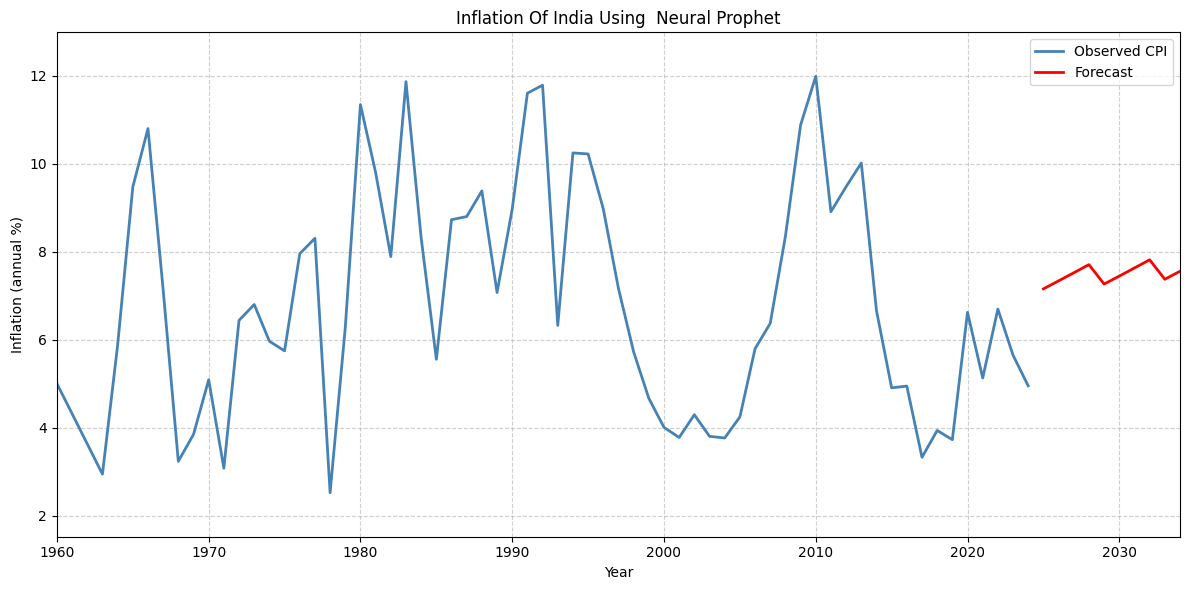

In [55]:
plt.figure(figsize=(12,6))


plt.plot(df["ds"], df["y"], label="Observed CPI", color="steelblue", linewidth=2)


plt.plot(forecast["ds"], forecast["yhat1"], label="Forecast", color="red", linewidth=2)

plt.xlabel("Year")
plt.ylabel("Inflation (annual %)")
#

plt.xlim(df["ds"].min(), forecast["ds"].max())
plt.ylim(df["y"].min() - 1, df["y"].max() + 1)
plt.title("Inflation Of India Using  Neural Prophet")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [56]:
data

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
23,India,IND,1960,1.779878
89,India,IND,1961,1.695213
157,India,IND,1962,3.632215
227,India,IND,1963,2.946161
297,India,IND,1964,13.355261
...,...,...,...,...
8736,India,IND,2020,6.623437
8925,India,IND,2021,5.131407
9114,India,IND,2022,6.699034
9302,India,IND,2023,5.649143


#try

In [57]:
# m = NeuralProphet(
#     # Use default number of change trendpoints (10)
   
#     # Disable seasonality components
#     yearly_seasonality=False,
#     weekly_seasonality=False,
#     daily_seasonality=False,
# )
# m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235
# metrics = m.fit(df)
# forecast = m.predict(df)
# m.plot(forecast)

In [58]:
# m.plot_parameters(components=["trend"])

